<a href="https://colab.research.google.com/github/shoaibahmad0/Intro-to-Data_Science/blob/main/regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]


import warnings
warnings.simplefilter(action = "ignore",category=FutureWarning)

In [7]:
full_data = pd.read_csv("/content/USA_Housing.csv")

In [9]:
print("train data :" ,full_data.shape)

train data : (5000, 7)


In [10]:
full_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
full_data.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]>

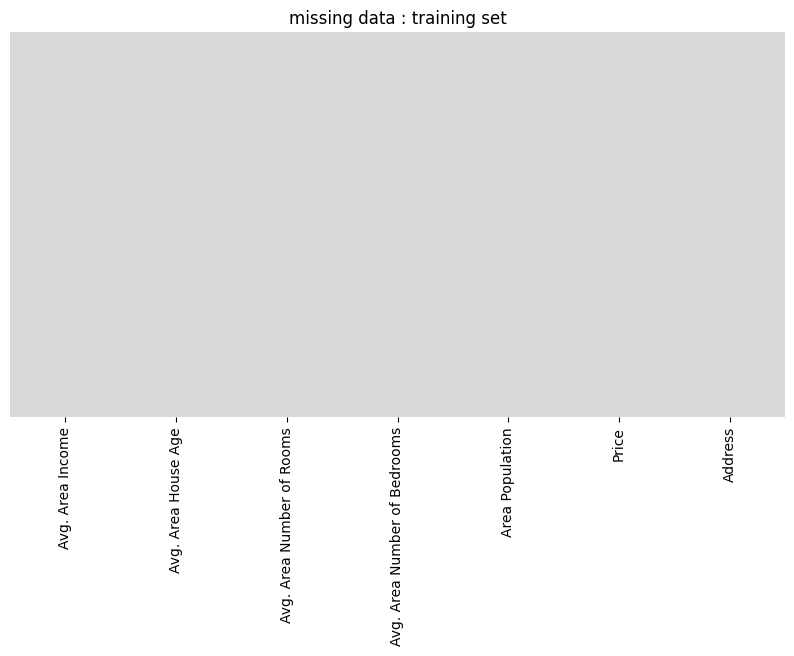

In [13]:
sns.heatmap(full_data.isnull(), yticklabels = False, cbar= False, cmap = 'tab20c_r')
plt.title("missing data : training set")
plt.show()

In [14]:
full_data.drop("Address", axis =1, inplace = True)

In [16]:
full_data.dropna(inplace = True)

In [17]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [18]:
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [20]:
full_data.shape

(5000, 6)

In [21]:
x = full_data.drop("Price",axis=1)


y = full_data['Price']

In [23]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.transform(x)

In [25]:
#pipe = make_pipeline(StandardScaler(), LogisticRegression())
#pipe.fit(x_train,y_train)

In [26]:
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [28]:
y.shape

(5000,)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state =101)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [33]:
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500,)
[1257098.09685349  822086.76211938 1739484.60206384  973128.9269703
  993918.45735573  645734.60078803 1074412.81648685  856463.98369062
 1445048.63352694 1201847.71924782 1454475.51805013 1296582.98910134
 1736858.04511704 1336694.59015483 1386280.00636484 1223122.34992068
  615840.78603611  964515.62334817 1222020.63802963 1197532.31828304
  506756.96702134 1767894.37065039 1854829.42630351 1198521.37525139
 1065384.60130188 1810199.62960618 1767830.26189968 1440162.9747667
 1386122.51652193 1539972.94909227  729561.93190619 1754434.69364763
 1465273.07428251 1026021.79840116 1283514.57970667  917688.32850804
 1185681.03610736 1000137.89595728 1329344.79847155  784262.29954368
 1392528.47637802  576569.30274928  823465.14446257 1893895.24014477
 1671565.73974773  964720.06183539 1129280.90868273  792574.96874635
 1159381.43948676 1473209.24685792 1459527.31772498 1164492.85979007
 1098752.99065475 1360158.14296951  843194.09463543  985298.51640372
 1123531.58586396 1252412.096

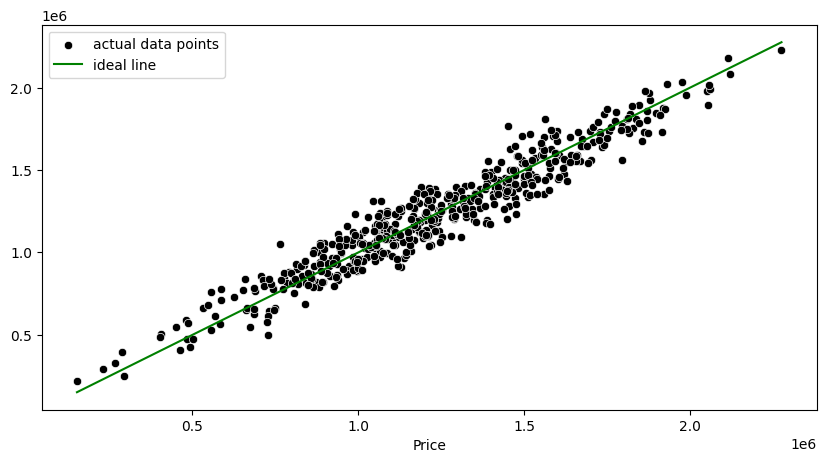

In [37]:
sns.scatterplot(x = y_test, y=y_pred,color='black',label="actual data points")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color = 'green', label='ideal line')

plt.legend()
plt.show()

In [39]:
results = np.column_stack((y_test,y_pred))

print("actual values   |   predicted value ")

print("-------------------------------------")
for actual, predicted in results:
  print(f"{actual:14.2f}  | {predicted:12.2f}")

actual values   |   predicted value 
-------------------------------------
    1251688.62  |   1257098.10
     873048.32  |    822086.76
    1696977.66  |   1739484.60
    1063964.29  |    973128.93
     948788.28  |    993918.46
     730043.65  |    645734.60
    1166925.15  |   1074412.82
     705444.12  |    856463.98
    1499988.88  |   1445048.63
    1288199.15  |   1201847.72
    1441736.76  |   1454475.52
    1279681.15  |   1296582.99
    1754969.16  |   1736858.05
    1511653.45  |   1336694.59
    1441956.20  |   1386280.01
    1119992.62  |   1223122.35
     727866.53  |    615840.79
    1138885.10  |    964515.62
    1074263.32  |   1222020.64
    1386473.37  |   1197532.32
     404643.60  |    506756.97
    1449829.49  |   1767894.37
    1775874.76  |   1854829.43
    1202050.58  |   1198521.38
    1105737.46  |   1065384.60
    1835564.69  |   1810199.63
    1795428.77  |   1767830.26
    1424283.37  |   1440162.97
    1365945.08  |   1386122.52
    1492011.50  |   153997

In [40]:
residual = actual-y_pred.reshape(-1)
print(residual)


[-4.47976991e+05 -1.29656563e+04 -9.30363496e+05 -1.64007821e+05
 -1.84797352e+05  1.63386505e+05 -2.65291711e+05 -4.73428778e+04
 -6.35927528e+05 -3.92726613e+05 -6.45354412e+05 -4.87461883e+05
 -9.27736939e+05 -5.27573484e+05 -5.77158901e+05 -4.14001244e+05
  1.93280320e+05 -1.55394518e+05 -4.12899532e+05 -3.88411212e+05
  3.02364139e+05 -9.58773265e+05 -1.04570832e+06 -3.89400269e+05
 -2.56263495e+05 -1.00107852e+06 -9.58709156e+05 -6.31041869e+05
 -5.77001411e+05 -7.30851843e+05  7.95591739e+04 -9.45313588e+05
 -6.56151968e+05 -2.16900693e+05 -4.74393474e+05 -1.08567223e+05
 -3.76559930e+05 -1.91016790e+05 -5.20223693e+05  2.48588063e+04
 -5.83407371e+05  2.32551803e+05 -1.43440386e+04 -1.08477413e+06
 -8.62444634e+05 -1.55598956e+05 -3.20159803e+05  1.65461371e+04
 -3.50260334e+05 -6.64088141e+05 -6.50406212e+05 -3.55371754e+05
 -2.89631885e+05 -5.51037037e+05 -3.40729888e+04 -1.76177411e+05
 -3.14410480e+05 -4.43290991e+05 -6.17494513e+05  3.09119767e+05
 -6.52248349e+05 -2.97038

<Axes: ylabel='Density'>

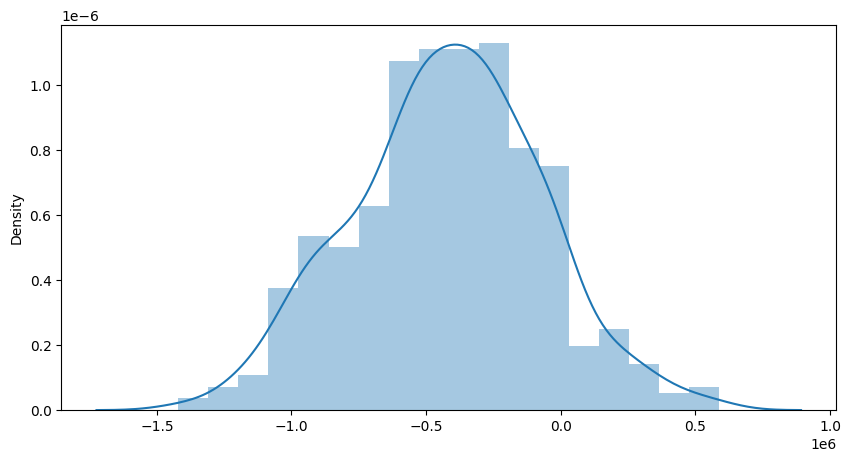

In [41]:
sns.distplot(residual,kde=True)

In [45]:
from sklearn.metrics import mean_squared_error

print("linear regression model ")
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('--'*30)

print("Mean squared Error : ", mse)
print("Root mean squared Error : ", rmse)

linear regression model 
------------------------------------------------------------
Mean squared Error :  9839952411.801708
Root mean squared Error :  99196.53427313732


In [46]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()

rf_regressor.fit(x_train,y_train)

y_pred_rf = rf_regressor.predict(x_test)
Dtr = mean_squared_error(y_pred_rf,y_test)

print("Decision Tree Regression ", Dtr)

Decision Tree Regression  30304274836.86253


In [47]:

rf_regressor = RandomForestRegressor()

rf_regressor.fit(x_train,y_train)

y_pred_rf = rf_regressor.predict(x_test)
Rfr = mean_squared_error(y_pred_rf,y_test)

print("Random Forest Regression ", Rfr)


Random Forest Regression  14226122170.309347


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(x_train,y_train)

y_pred_gb = gb_regressor.predict(x_test)
Gbr = mean_squared_error(y_pred_gb,y_test)

print("Gradient Boosting Regression ", Gbr)


Gradient Boosting Regression  12050181426.45495


In [53]:
model_score ={
    "linear regression":9839952411.801708,
    "decision tree":30304274836.86253,
    "random forest":14226122170.309347,
    "gradient boosting":12050181426.45495
}

sorted_scores = sorted(model_score.items(), key=lambda x: x[1])

print("model ranking( lower values are better)")

for rank, (model_name, score) in enumerate(sorted_scores, start=1):
  print(f"{rank}. {model_name}: {score}")

model ranking( lower values are better)
1. linear regression: 9839952411.801708
2. gradient boosting: 12050181426.45495
3. random forest: 14226122170.309347
4. decision tree: 30304274836.86253
